In [1]:
import pandas as pd 
import numpy as np 
import re 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix ,precision_score,recall_score,roc_auc_score,roc_curve,accuracy_score
from fast_ml.model_development import train_valid_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()
#We have 3 object features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()
#There is no Null Values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1 , inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:ylabel='EstimatedSalary'>

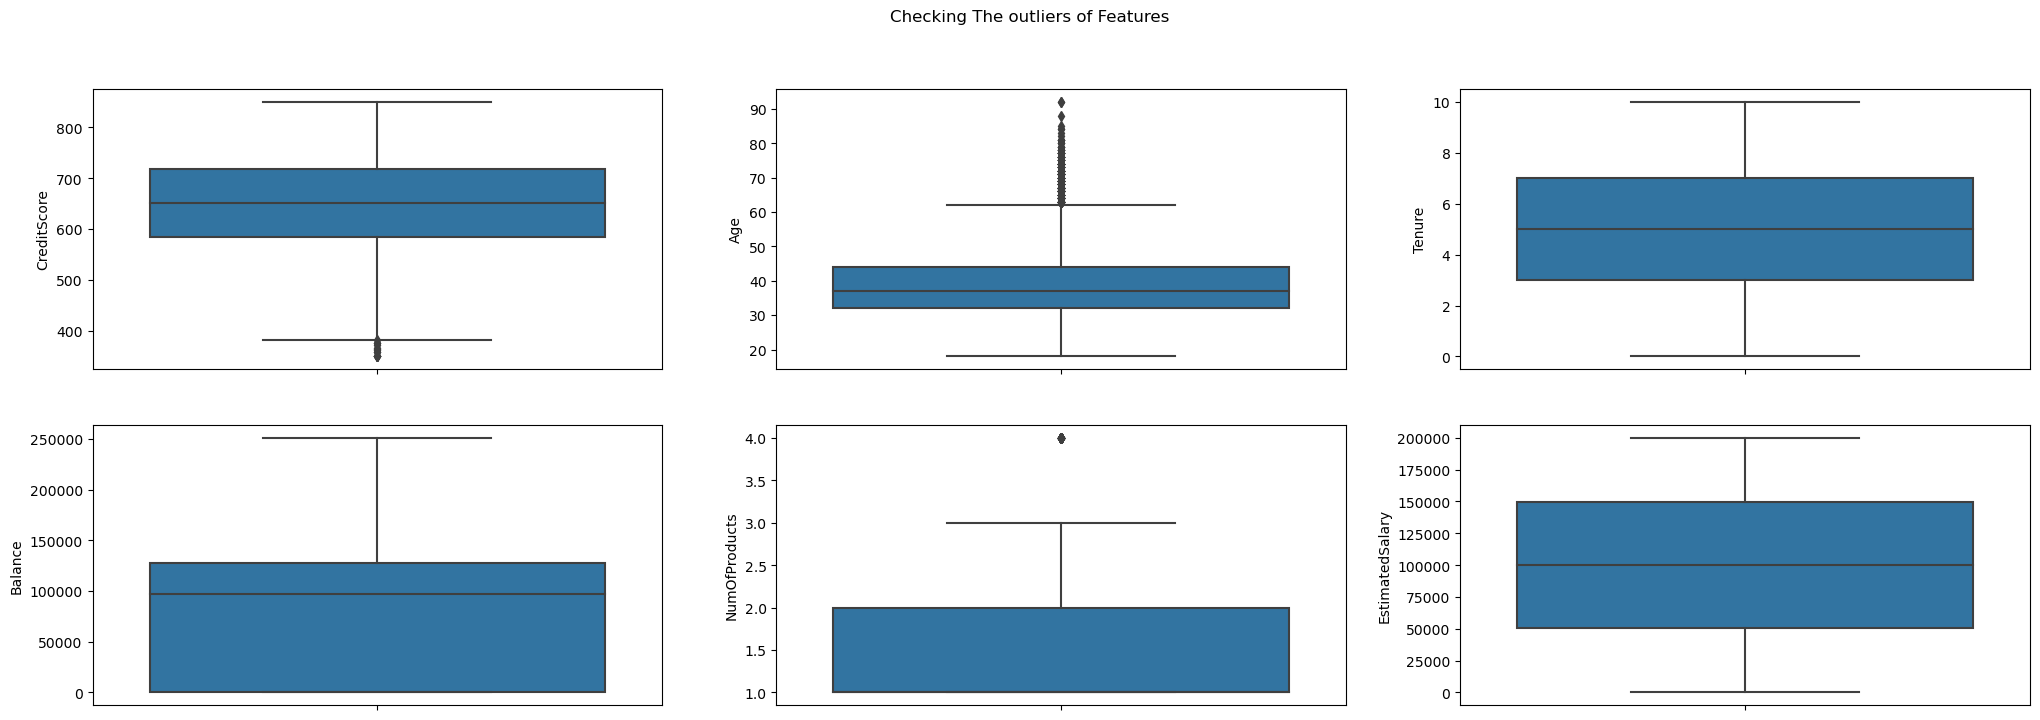

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))

fig.suptitle('Checking The outliers of Features')

sns.boxplot(ax=axes[0, 0], data=df, y='CreditScore')
sns.boxplot(ax=axes[0, 1], data=df, y='Age')
sns.boxplot(ax=axes[0, 2], data=df, y='Tenure')
sns.boxplot(ax=axes[1, 0], data=df, y='Balance')
sns.boxplot(ax=axes[1, 1], data=df, y='NumOfProducts')
sns.boxplot(ax=axes[1, 2], data=df, y='EstimatedSalary')



In [11]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

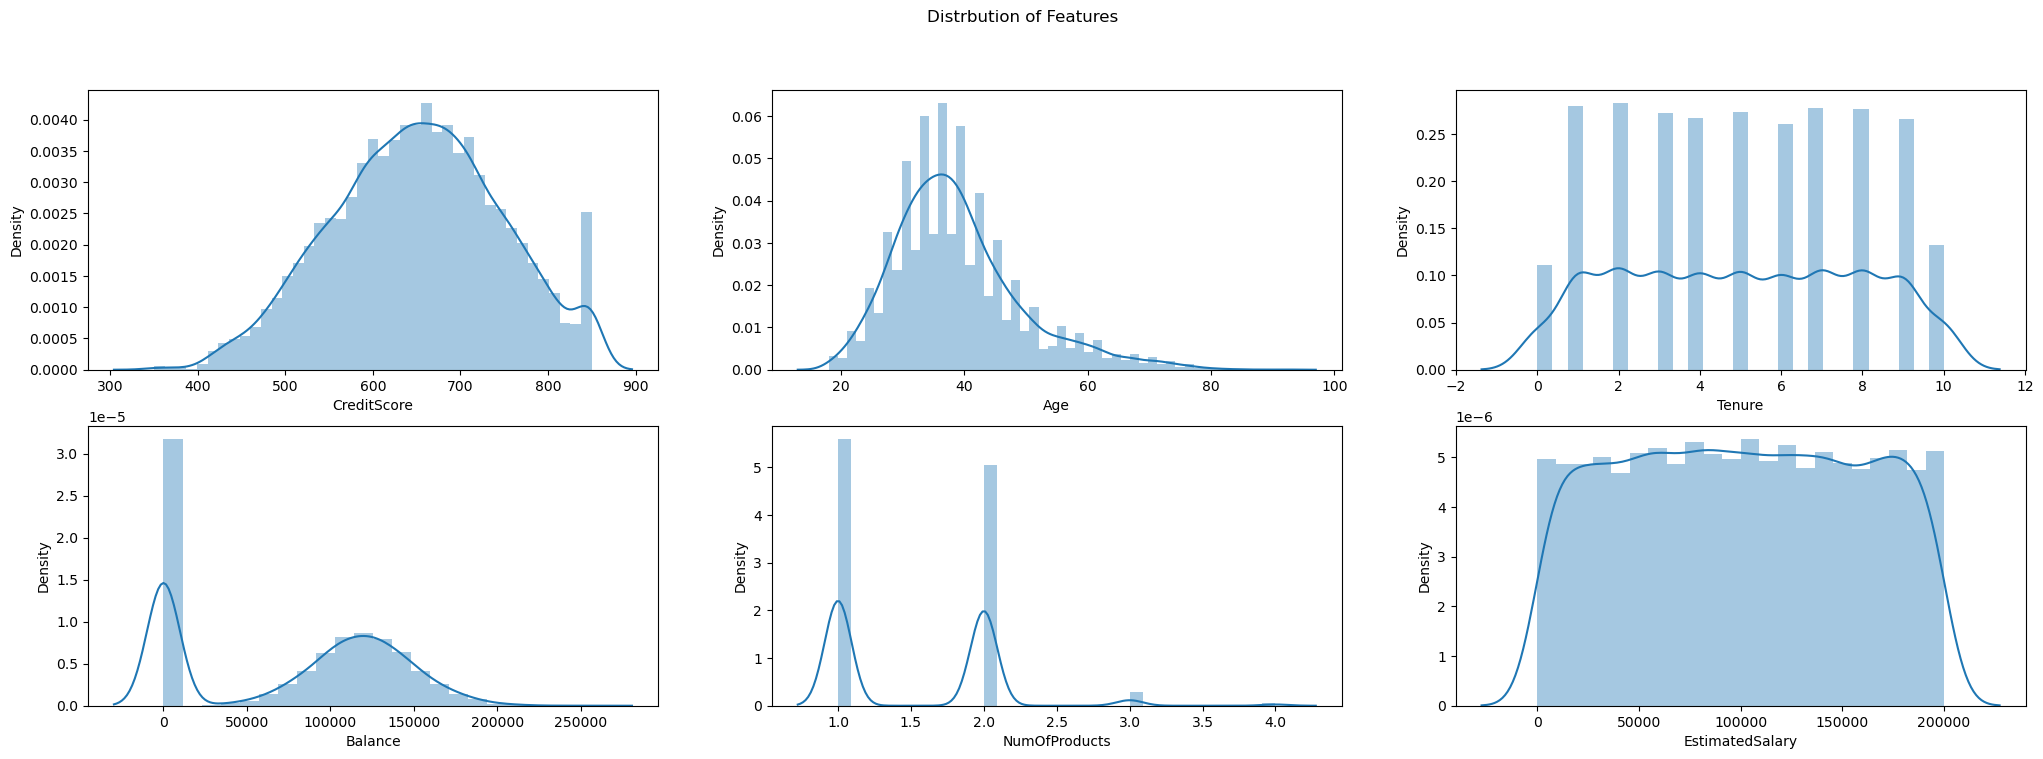

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))

fig.suptitle('Distrbution of Features ')

sns.distplot(df.CreditScore,ax=axes[0, 0])
sns.distplot(df.Age,ax=axes[0, 1])
sns.distplot(df.Tenure,ax=axes[0, 2])
sns.distplot(df.Balance,ax=axes[1, 0])
sns.distplot(df.NumOfProducts,ax=axes[1, 1]  )
sns.distplot(df.EstimatedSalary,ax=axes[1, 2])



In [13]:
min_thresold, max_thresold = df.NumOfProducts.quantile([0.001, 0.999])


In [14]:
min_thresold1, max_thresold1 = df.Age.quantile([0.001, 0.999])



In [15]:
print(min_thresold1)
print(max_thresold1)


18.0
81.0


In [16]:
df=df[(df.NumOfProducts>=min_thresold) & (df.NumOfProducts<max_thresold)]

In [17]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
Name: NumOfProducts, dtype: int64

In [18]:
df=df[(df.Age>=min_thresold1) & (df.Age<max_thresold1)]

<AxesSubplot:ylabel='EstimatedSalary'>

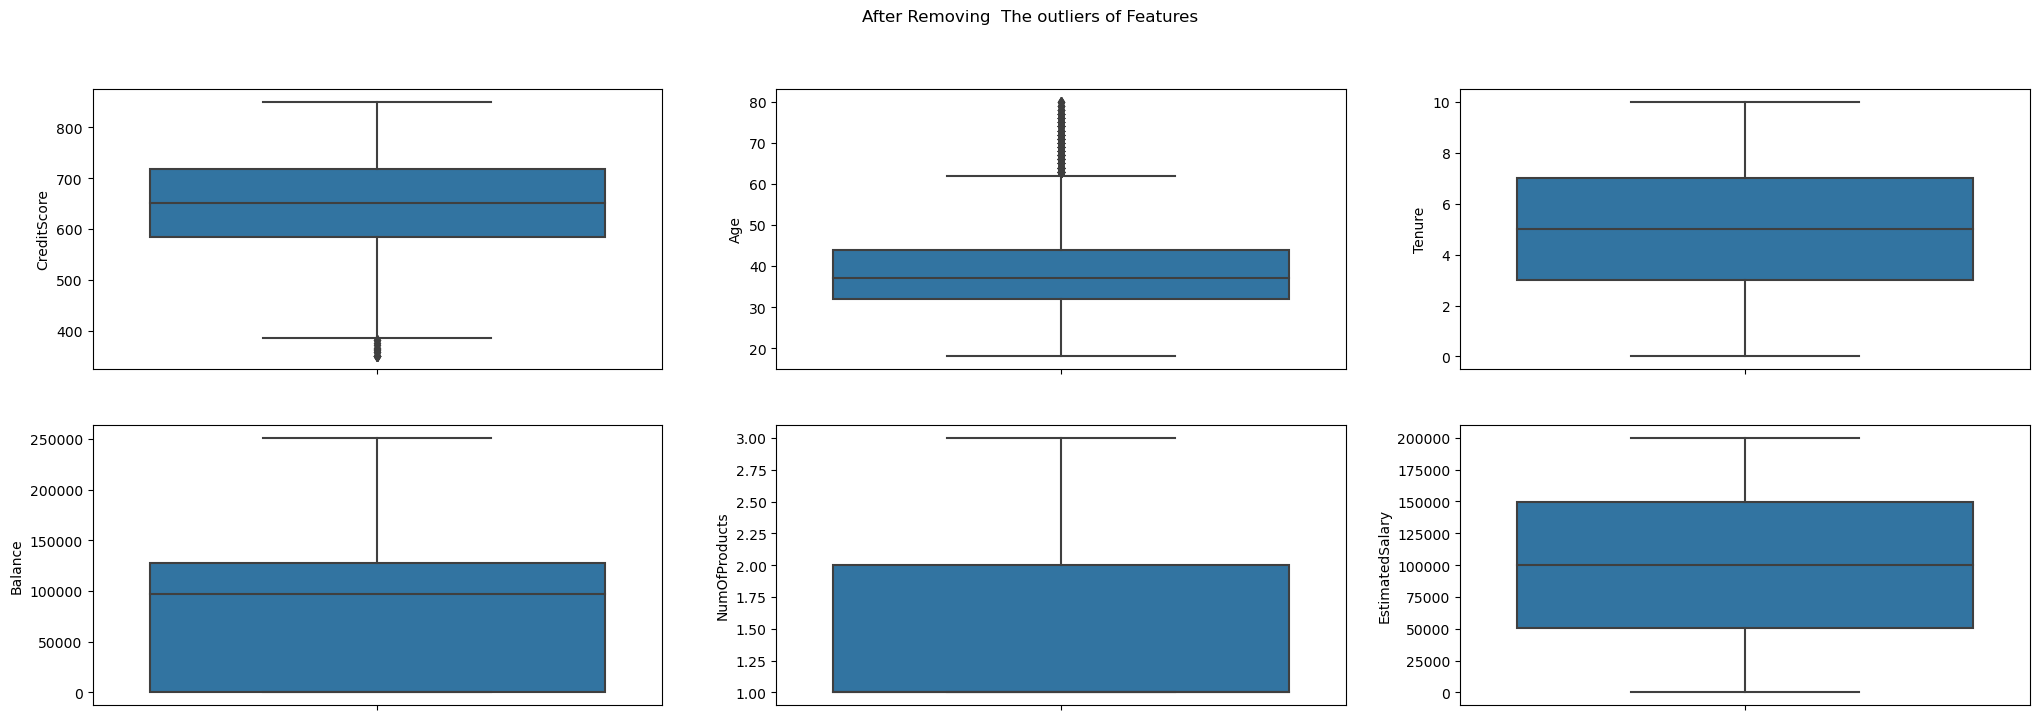

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))

fig.suptitle('After Removing  The outliers of Features')

sns.boxplot(ax=axes[0, 0], data=df, y='CreditScore')
sns.boxplot(ax=axes[0, 1], data=df, y='Age')
sns.boxplot(ax=axes[0, 2], data=df, y='Tenure')
sns.boxplot(ax=axes[1, 0], data=df, y='Balance')
sns.boxplot(ax=axes[1, 1], data=df, y='NumOfProducts')
sns.boxplot(ax=axes[1, 2], data=df, y='EstimatedSalary')



<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

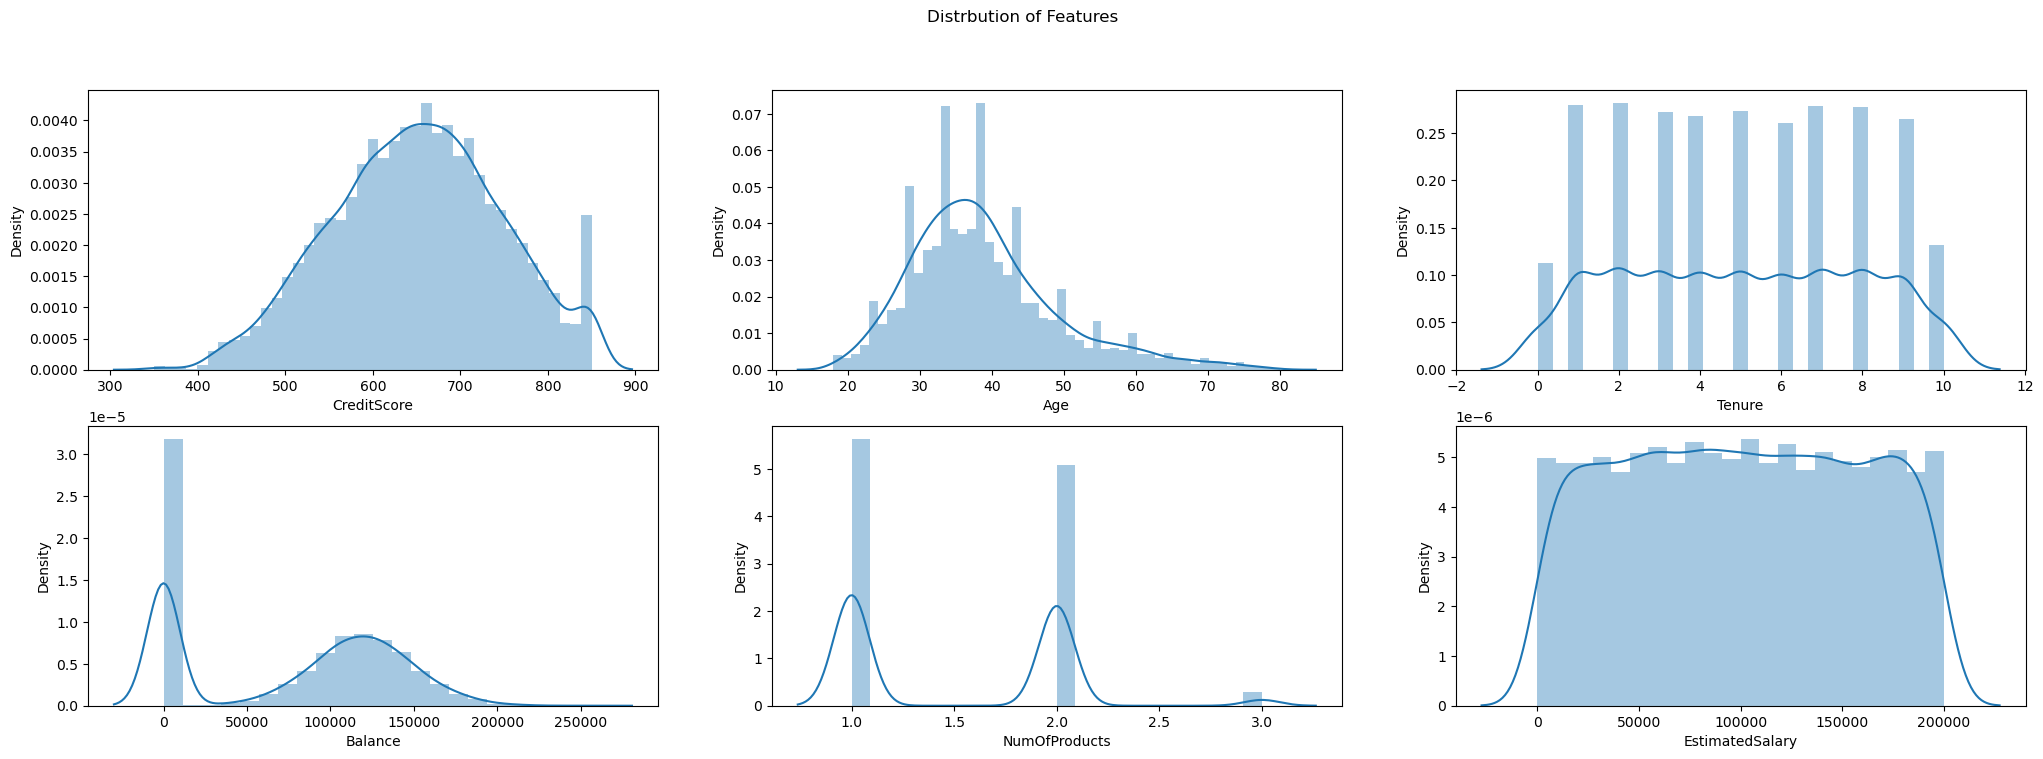

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))

fig.suptitle('Distrbution of Features ')

sns.distplot(df.CreditScore,ax=axes[0, 0])
sns.distplot(df.Age,ax=axes[0, 1])
sns.distplot(df.Tenure,ax=axes[0, 2])
sns.distplot(df.Balance,ax=axes[1, 0])
sns.distplot(df.NumOfProducts,ax=axes[1, 1]  )
sns.distplot(df.EstimatedSalary,ax=axes[1, 2])



<AxesSubplot:xlabel='Exited', ylabel='count'>

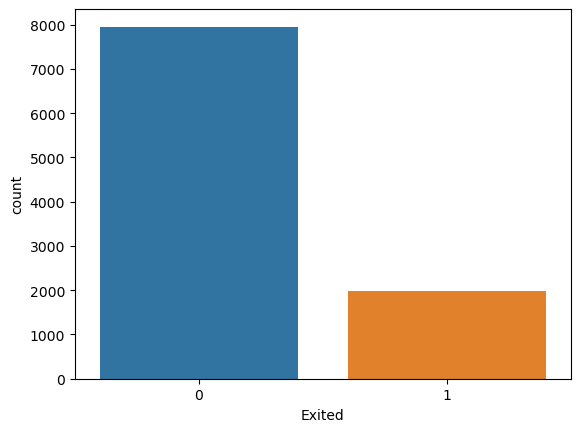

In [101]:
sns.countplot(df.Exited)

In [22]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [23]:
for obj_columns in [ 'Gender', 'Geography']:
    new = pd.get_dummies(df[obj_columns])
    df = pd.concat([df, new], axis=1)
    df = df.drop(obj_columns, axis=1)

In [24]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0
10,528,31,6,102016.72,2,0,0,80181.12,0,0,1,1,0,0


In [25]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Female', 'Male',
       'France', 'Germany', 'Spain'],
      dtype='object')

<AxesSubplot:>

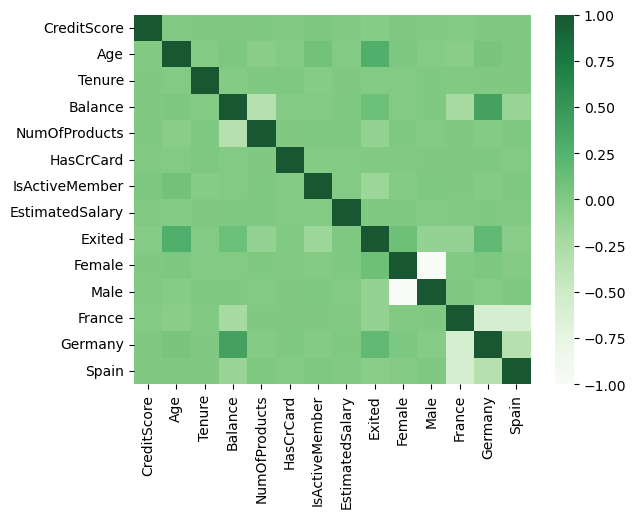

In [138]:
corr_mat=df.corr()
sns.heatmap(corr_mat,cmap='Greens',alpha=0.9)

In [27]:
x=df.drop('Exited',axis=1)
y=df.Exited 
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,1,0


In [28]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [31]:
print('The length of x_train is {}'.format(len(x_train)))
print('The length of x_valid is {}'.format(len(x_valid)))
print('The length of x_test is {}'.format(len(x_test)))

The length of x_train is 6353
The length of x_valid is 1589
The length of x_test is 1986


In [32]:
x_train=stand.fit_transform(x_train)
x_test=stand.transform(x_test)

In [33]:
x_valid=stand.transform(x_valid)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
para_grid={'criterion':['gini','entropy'],
           'max_depth':[2,3,5,7,9,10]}
grid=GridSearchCV(dt,para_grid,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print('The best hyperparameters is {}'.format(grid.best_params_))

The best hyperparameters is {'criterion': 'gini', 'max_depth': 5}


In [37]:
dt= DecisionTreeClassifier(criterion='gini',max_depth=5)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_pred_valid=dt.predict(x_valid)


In [38]:
dt_sco=accuracy_score(y_test,dt_pred)
dt_sco_valid=accuracy_score(y_valid,dt_pred_valid)

In [39]:

print('the test score is {:2f}'.format(dt_sco))
print('the valid score is {:2f}'.format(dt_sco_valid))

the test score is 0.856999
the valid score is 0.862807


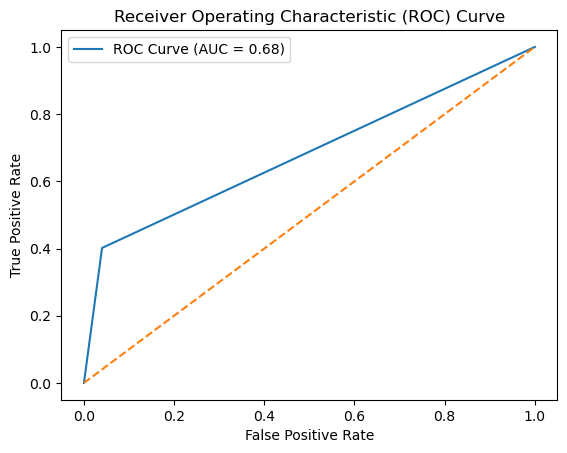

In [40]:

fpr, tpr, thresholds = roc_curve(y_test, dt_pred)

roc_auc_dt = roc_auc_score(y_test, dt_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:>

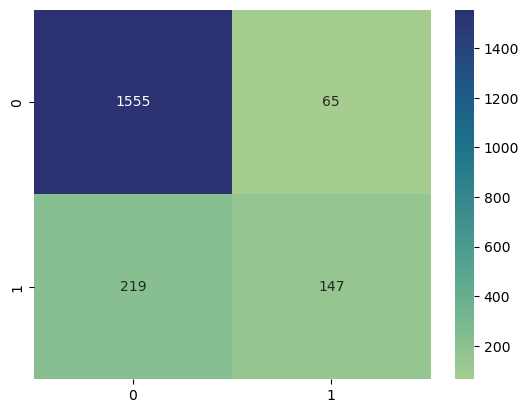

In [41]:
conf_mat_dt=confusion_matrix(y_test,dt_pred)
sns.heatmap(conf_mat_dt,annot=True,fmt='d',cmap='crest')

<AxesSubplot:ylabel='count'>

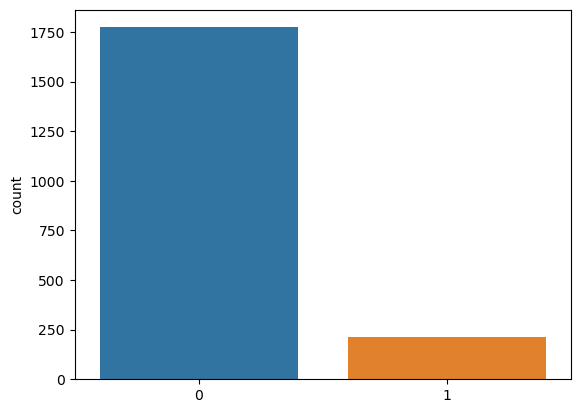

In [102]:
sns.countplot(dt_pred)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_model= KNeighborsClassifier()

In [44]:
para_grid={'n_neighbors':[9,11,15,25,30],
           'weights':['uniform','distance']}
grid=GridSearchCV(knn_model,para_grid,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print('best parameters is {}'.format(grid.best_params_))


best parameters is {'n_neighbors': 15, 'weights': 'distance'}


In [45]:
knn_model= KNeighborsClassifier(n_neighbors=30,weights='uniform')
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)

In [46]:
knn_sco=accuracy_score(y_test,knn_pred)
print('the test score is {:2f}'.format(knn_sco))


the test score is 0.832830


<AxesSubplot:>

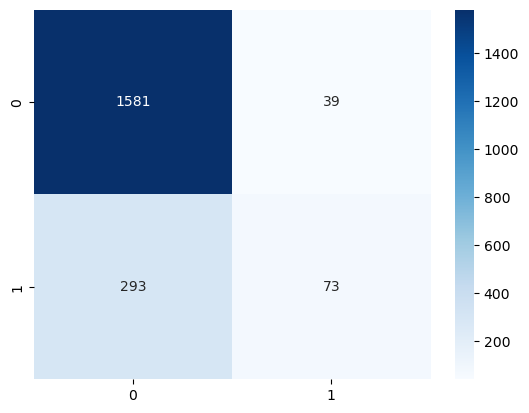

In [47]:
conf_mat_knn=confusion_matrix(y_test,knn_pred)
sns.heatmap(conf_mat_knn,annot=True,fmt='d',cmap='Blues')

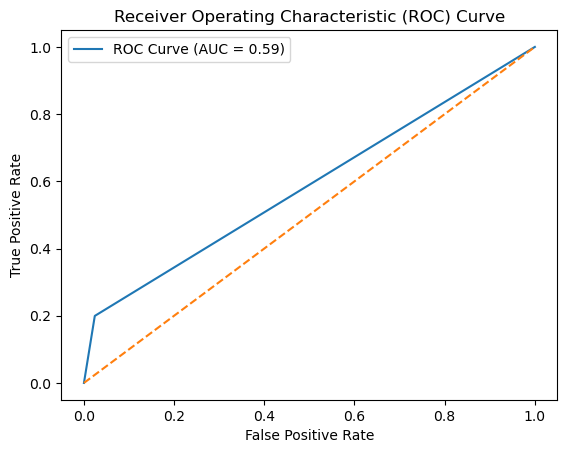

In [48]:

fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

roc_auc_knn = roc_auc_score(y_test, knn_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

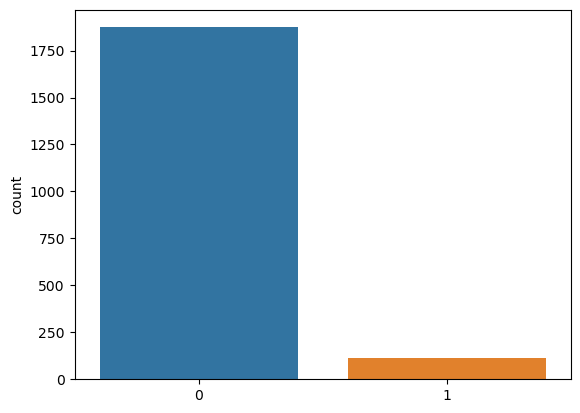

In [103]:
sns.countplot(knn_pred)

In [49]:
from sklearn.svm import SVC 
svc_model= SVC()

In [50]:
param_grid= {
    'C':[0.1,1,10],
    'kernel':['linear','poly','rbf']
    , 'gamma':['auto','scale']
}
grid_search = GridSearchCV(svc_model, param_grid, cv=5,n_jobs=-1 )


grid_search.fit(x_train, y_train)


print(f"Best Hyperparameters: {grid_search.best_params_}")




Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [51]:
svc_model= SVC(C=1,gamma='scale',kernel='rbf')
svc_model.fit(x_train,y_train) 
svc_pred=svc_model.predict(x_test)

In [52]:
svc_sco=accuracy_score(y_test,svc_pred)


In [53]:
print(svc_sco)

0.8685800604229608


<AxesSubplot:>

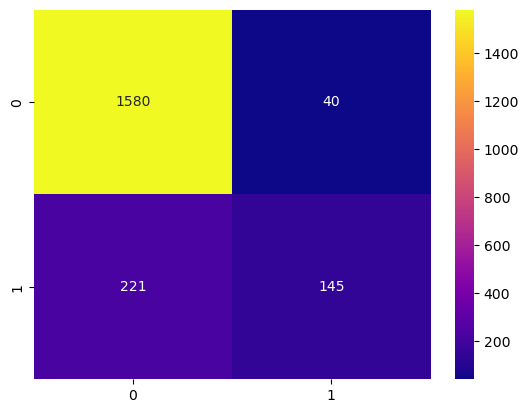

In [54]:
conf_mat_svc=confusion_matrix(y_test,svc_pred)
sns.heatmap(conf_mat_svc,annot=True,fmt='d',cmap='plasma')

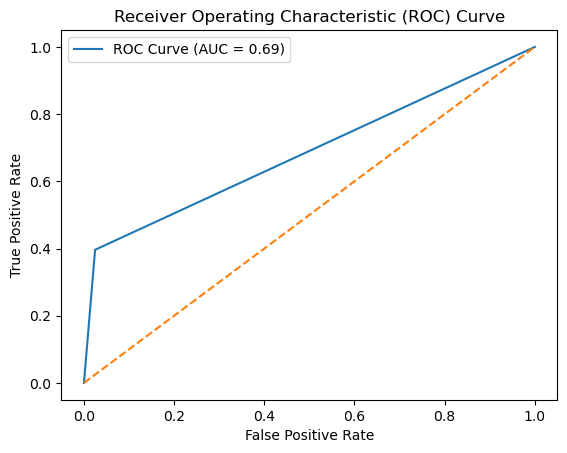

In [55]:

fpr, tpr, thresholds = roc_curve(y_test, svc_pred)

roc_auc_svc = roc_auc_score(y_test, svc_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

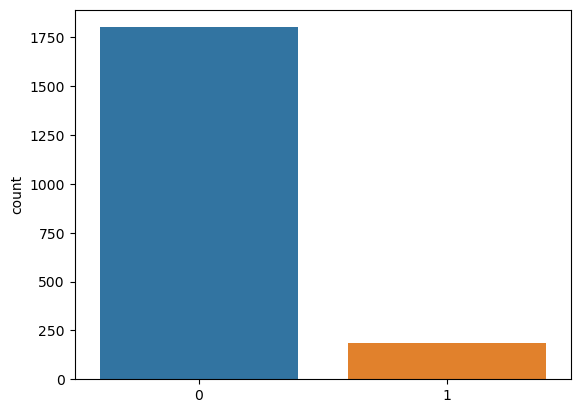

In [104]:
sns.countplot(svc_pred)

In [69]:
from sklearn.linear_model import LinearRegression,Lasso,RidgeClassifier

lin_model = LinearRegression( )

In [57]:
lin_model.fit(x_train,y_train)
lin_pred=lin_model.predict(x_test)

In [142]:
lin_pred_threshold= [0 if x < 0.5 else 1 for x in lin_pred]

lin_sco= accuracy_score(y_test,lin_pred_threshold)

<AxesSubplot:>

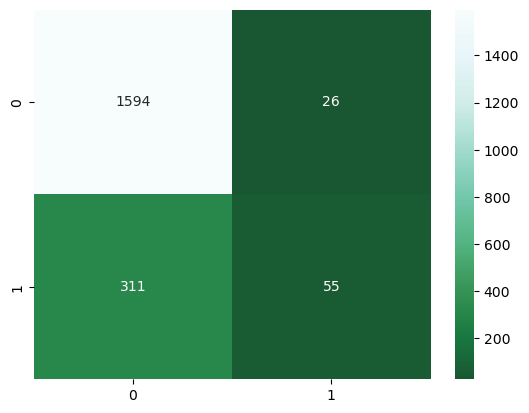

In [109]:
conf_mat_lin= confusion_matrix(y_test,lin_pred_threshold)
sns.heatmap(conf_mat_lin,annot=True,fmt='d',cmap='BuGn_r',alpha=0.9)

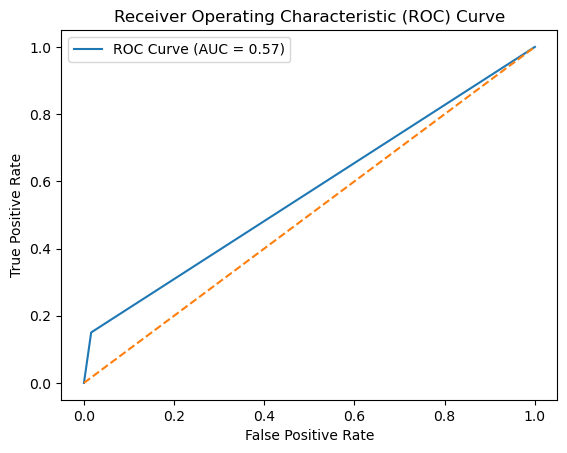

In [112]:

fpr, tpr, thresholds = roc_curve(y_test, lin_pred_threshold)

roc_auc_lin = roc_auc_score(y_test, lin_pred_threshold)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_lin))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

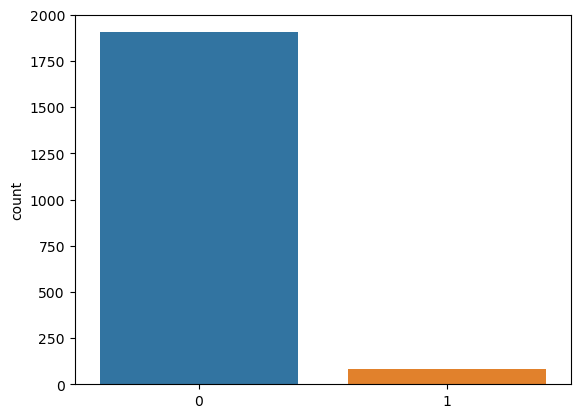

In [113]:
sns.countplot(lin_pred_threshold)

In [81]:
rd_model = RidgeClassifier(alpha=0.5)
rd_model.fit(x_train,y_train) 

RidgeClassifier(alpha=0.5)

In [114]:
rd_pred= rd_model.predict(x_test)
rd_sco= accuracy_score(y_test,rd_pred)

<AxesSubplot:>

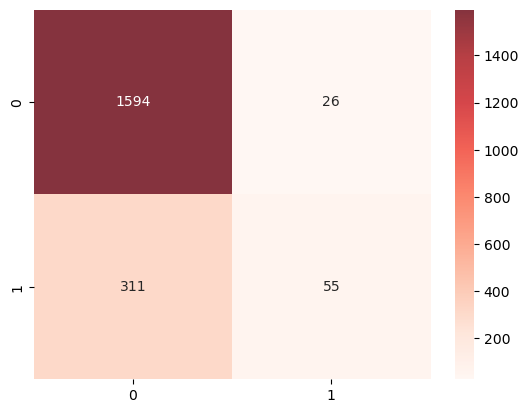

In [117]:
conf_mat_rd=confusion_matrix(y_test,rd_pred)
sns.heatmap(conf_mat_rd,annot=True,fmt='d',cmap='Reds',alpha= 0.8)

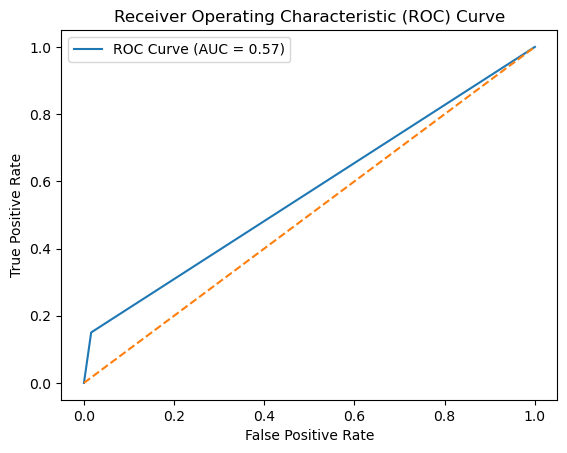

In [118]:

fpr, tpr, thresholds = roc_curve(y_test, rd_pred)

roc_auc_rd = roc_auc_score(y_test, rd_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_rd))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

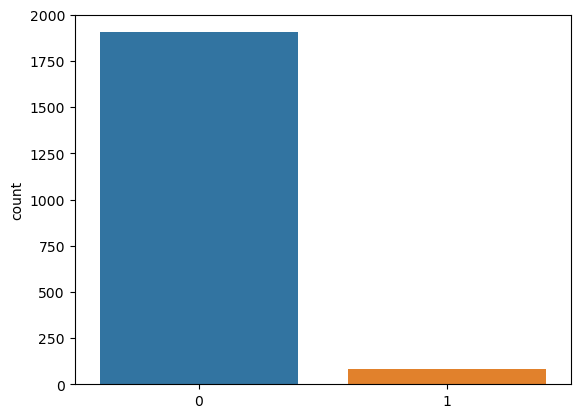

In [119]:
sns.countplot(rd_pred)

In [92]:
lass_model = Lasso(alpha=0.5)
lass_model.fit(x_train,y_train)

Lasso(alpha=0.5)

In [93]:
ls_pred=lass_model.predict(x_test )

In [94]:
lass_pred=[0 if x < 0.5 else 1 for x in ls_pred]

In [120]:
lass_sco= accuracy_score(y_test,lass_pred)

<AxesSubplot:>

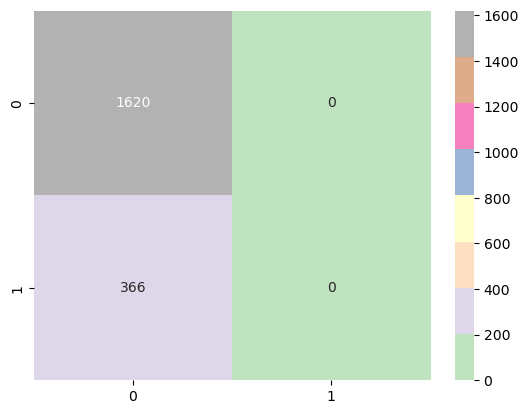

In [127]:
conf_mat_lass=confusion_matrix(y_test,lass_pred)
sns.heatmap(conf_mat_lass,annot=True , fmt='d',cmap='Accent',alpha=0.5)

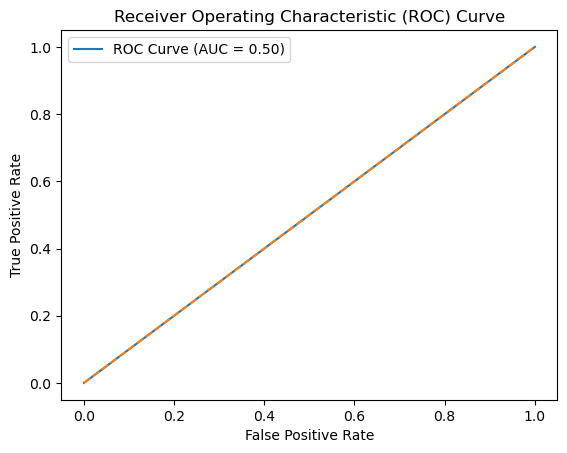

In [128]:

fpr, tpr, thresholds = roc_curve(y_test, lass_pred)

roc_auc_lass= roc_auc_score(y_test, lass_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_lass))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

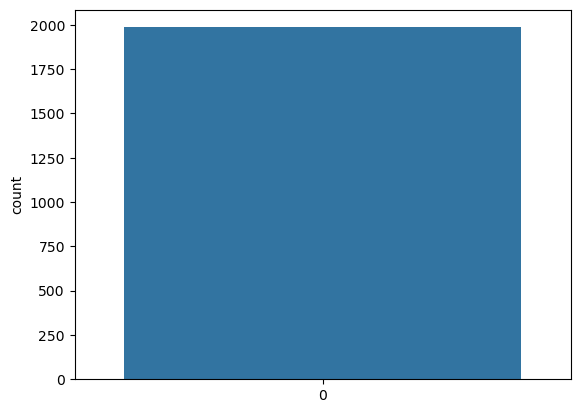

In [129]:
sns.countplot(lass_pred)

In [96]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)



LogisticRegression()

In [97]:
log_pr=log_model.predict(x_test)
log_pred=[0 if x < 0.5 else 1 for x in log_pr]

In [130]:
log_sco= accuracy_score(y_test,log_pred)

<AxesSubplot:>

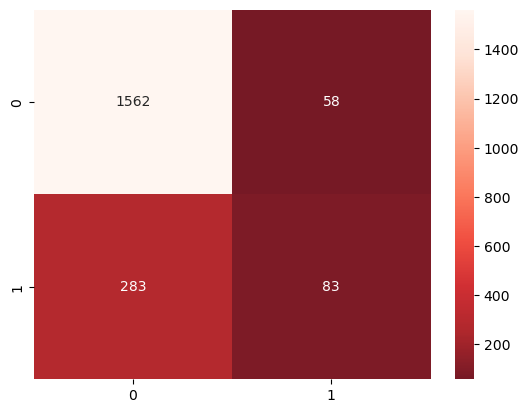

In [132]:
conf_mat_log=confusion_matrix(y_test,log_pred)
sns.heatmap(conf_mat_log,annot=True , fmt='d',cmap='Reds_r',alpha=0.9)

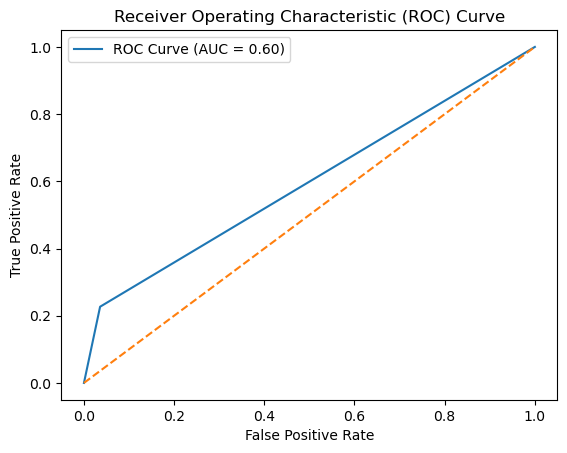

In [139]:

fpr, tpr, thresholds = roc_curve(y_test, log_pred)

roc_auc_log= roc_auc_score(y_test, log_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_log))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

<AxesSubplot:ylabel='count'>

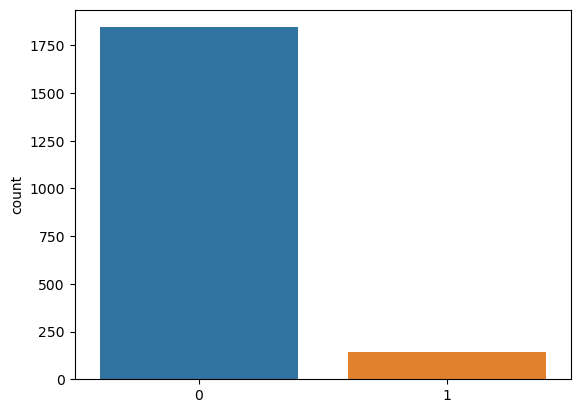

In [140]:
sns.countplot(log_pred)

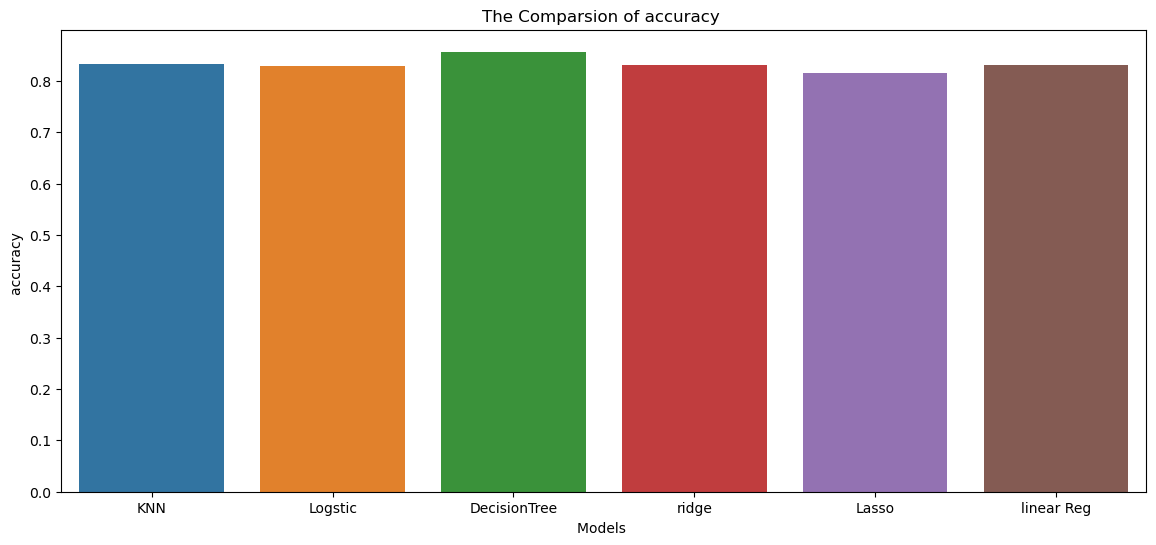

In [151]:
compare={ 'Models':['KNN','Logstic','DecisionTree','ridge','Lasso','linear Reg'],
         'accuracy': [knn_sco,log_sco,dt_sco,rd_sco,lass_sco,lin_sco]}
plt.figure(figsize=(14,6))
sns.barplot(data=compare,x='Models',y='accuracy')
plt.title('The Comparsion of accuracy ')
plt.xlabel('Models ')
plt.ylabel('accuracy ')
plt.show()